In [2]:
import os
import shutil

def move_jpg_files(source_dir, target_dir):
    # Ensure the target directory exists
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)
    
    # Walk through all folders and subfolders in the source directory
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            if file.endswith('.jpg'):
                # Construct full file path
                file_path = os.path.join(root, file)
                # Destination file path
                dest_path = os.path.join(target_dir, file)
                # Move the file to the target directory (overwrite if exists)
                shutil.move(file_path, dest_path)
                print(f"Moved: {file_path} to {dest_path}")

# Define the source directory (where the folders and subfolders are)
source_dir = r'C:\Data\Bereau'  # Adjust this path as needed

# Define the target directory (where all .jpg files will be moved)
target_dir = os.path.join(source_dir, 'resumes-images')  # Adjust this path as needed

# Move .jpg files
move_jpg_files(source_dir, target_dir)

# Confirm completion
print(f"All .jpg files have been moved to {target_dir}")

Moved: C:\Data\Bereau\2\Elegant graphic design resume\Elegant graphic design resume-1.jpg to C:\Data\Bereau\resumes-images\Elegant graphic design resume-1.jpg
Moved: C:\Data\Bereau\2\Geometric resume\Geometric resume-1.jpg to C:\Data\Bereau\resumes-images\Geometric resume-1.jpg
Moved: C:\Data\Bereau\2\Geometric resume\Geometric resume-2.jpg to C:\Data\Bereau\resumes-images\Geometric resume-2.jpg
Moved: C:\Data\Bereau\2\Geometric resume\Geometric resume-3.jpg to C:\Data\Bereau\resumes-images\Geometric resume-3.jpg
Moved: C:\Data\Bereau\2\Impact resume\Impact resume-1.jpg to C:\Data\Bereau\resumes-images\Impact resume-1.jpg
Moved: C:\Data\Bereau\2\Impact resume\Impact resume-2.jpg to C:\Data\Bereau\resumes-images\Impact resume-2.jpg
Moved: C:\Data\Bereau\2\Impact resume\Impact resume-3.jpg to C:\Data\Bereau\resumes-images\Impact resume-3.jpg
Moved: C:\Data\Bereau\2\Modern chronological resume\Modern chronological resume-1.jpg to C:\Data\Bereau\resumes-images\Modern chronological resume-1

Epoch 1/10


3/3 [==============================] - 12s 4s/step - loss: 0.5701 - accuracy: 0.7191 - val_loss: 0.5784 - val_accuracy: 0.6087
Epoch 2/10
3/3 [==============================] - 11s 4s/step - loss: 0.3634 - accuracy: 0.8539 - val_loss: 0.3492 - val_accuracy: 0.8696
Epoch 3/10
3/3 [==============================] - 11s 4s/step - loss: 0.2495 - accuracy: 0.9213 - val_loss: 0.2939 - val_accuracy: 0.9565
Epoch 4/10
3/3 [==============================] - 11s 4s/step - loss: 0.1664 - accuracy: 0.9775 - val_loss: 0.2715 - val_accuracy: 0.9565
Epoch 5/10
3/3 [==============================] - 11s 4s/step - loss: 0.1441 - accuracy: 0.9551 - val_loss: 0.2587 - val_accuracy: 0.9565
Epoch 6/10
3/3 [==============================] - 11s 4s/step - loss: 0.1032 - accuracy: 0.9775 - val_loss: 0.2625 - val_accuracy: 0.9565
Epoch 7/10
3/3 [==============================] - 11s 4s/step - loss: 0.1212 - accuracy: 0.9663 - val_loss: 0.2271 - val_accuracy: 0.9565
Epoch 8/10
3/3 [================

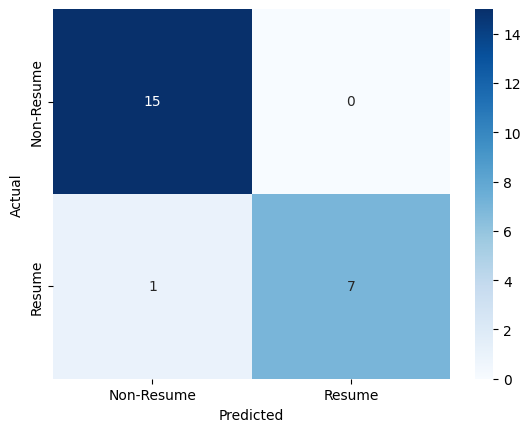

In [10]:
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Function to preprocess images
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = image / 255.0  # Normalize to [0, 1]
    return image

# Load and preprocess images
def load_dataset(base_folder):
    images = []
    labels = []
    for label, subfolder in enumerate(['resumes', 'non_resumes']):
        folder_path = os.path.join(base_folder, subfolder)
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            image = preprocess_image(image_path)
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Example usage
base_folder = 'C:/Data/Bereau'
images, labels = load_dataset(base_folder)

# Split the dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Model architecture
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=32),
    epochs=10,
    validation_data=(val_images, val_labels)
)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_images, val_labels)
print(f"Validation accuracy: {val_accuracy}")

# Predict on validation set
y_pred = model.predict(val_images)
y_pred = (y_pred > 0.5).astype(int)

# Classification report
print(classification_report(val_labels, y_pred))

# Confusion matrix
cm = confusion_matrix(val_labels, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Resume", "Resume"], yticklabels=["Non-Resume", "Resume"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
model.save('resume_classifier_model.h5')

c:\Users\31687\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
